# Exercise 13 – Titanic Survival Prediction
- Predicts survival using decision tree.  
- Encodes Sex as numeric.  
- Fills missing ages with mean.  
- Accuracy = correct predictions ratio.

In [24]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt

In [25]:
# Load your dataset
df = pd.read_csv("/Users/jacobfrancis/dev/csc180/csv/titanic.csv")

# Select only the columns we need
df = df[['Pclass', 'Sex', 'Age', 'Fare', 'Survived']]

# Check for missing values
df.isnull().sum()


Pclass        0
Sex           0
Age         177
Fare          0
Survived      0
dtype: int64

In [26]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [27]:
# Convert 'Sex' column to numeric (male=0, female=1)
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])

df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,1,22.0,7.2500,0
1,1,0,38.0,71.2833,1
2,3,0,26.0,7.9250,1
3,1,0,35.0,53.1000,1
4,3,1,35.0,8.0500,0


In [28]:
X = df[['Pclass', 'Sex', 'Age', 'Fare']]
y = df['Survived']

# Split data into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# Create and train model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [30]:
# Predict on test data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

# Optional detailed report
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Model Accuracy: 0.7542

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79       105
           1       0.70      0.72      0.71        74

    accuracy                           0.75       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.76      0.75      0.75       179



In [31]:
# Confusion matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[82 23]
 [21 53]]


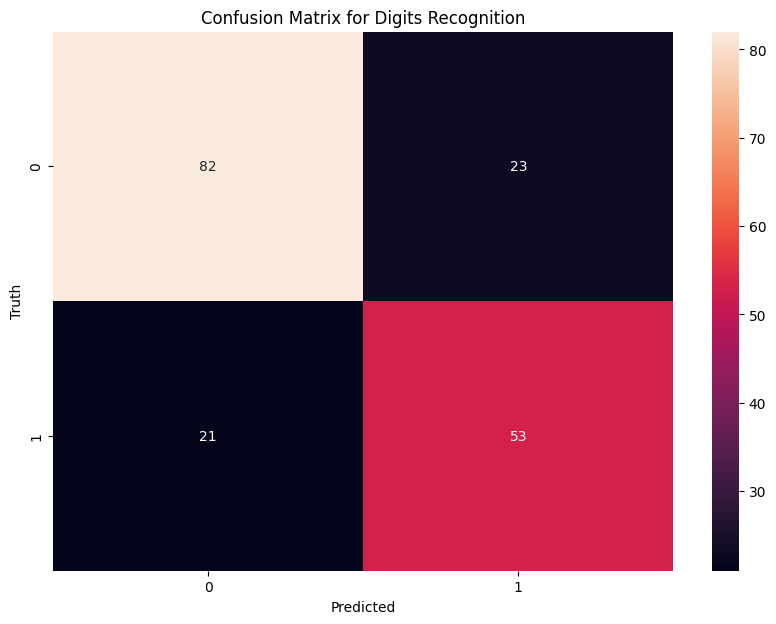

In [ ]:
# Visualize confusion matrix
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix for Digits Recognition')
plt.show()


# The model predicts discrete categories (0 = did not survive, 1 = survived).
# Therefore, the confusion matrix directly compares true vs. predicted class labels.

In [ ]:
# 82, Correctly predicted people who did NOT survive.
# 53, correctly predicted people who survived.
# 23, predicited survival when the person didnt
# 21, predicted death when the person survived.